# Credit Card Fraud Detection 

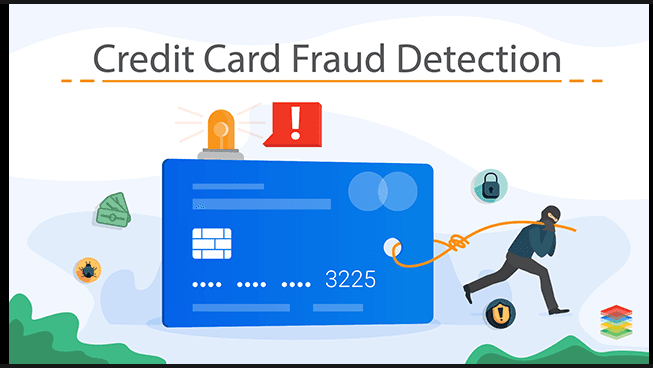

### Problem Statement: 
* Detecting the fraud transaction by analysing and building model on past transaction data.

### About the dataset:
* Data is taken from kaggle.
* The data is credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020
* Data is USA based.

### Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
df1=pd.read_csv(r"E:\Courses\Data science(ETLHive)\Laptop backup\python notebook\dfv3-1.csv")
df2=pd.read_csv(r"E:\Courses\Data science(ETLHive)\Laptop backup\python notebook\dfv3-2.csv")

In [3]:
df=df1.append(df2,ignore_index=True)

## <font color='Red'> Understanding Data</font>

In [4]:
df.shape

(20000, 23)

In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,261604,25-09-2020 21:36,5.359540e+15,fraud_Mosciski Group,travel,8517.38,Michael,Francis,M,1833 Jeanette Stravenue,...,45.7801,-111.1439,18182,"Engineer, drilling",29-06-1975,e5b4abde3491493d1d9897b24cba9c58,1380145007,45.534538,-111.433653,0
1,375959,15-11-2020 04:58,3.513620e+15,fraud_Dooley-Thompson,misc_net,187.99,Amber,Perez,F,954 Reyes Ways,...,43.7588,-97.8712,355,Financial adviser,26-06-1955,23eeeb38d1016ec5d1f68437fb111321,1384491501,44.691168,-97.995122,0
2,372597,13-11-2020 12:15,3.023540e+13,fraud_Roberts-Beahan,misc_pos,7.81,James,Baldwin,M,3603 Mitchell Court,...,38.5072,-81.8900,5512,Exhibition designer,24-03-1980,bd72062b703de9aa426c7e73f13ec98e,1384344918,39.201981,-82.561837,0
3,23294,29-06-2020 08:55,6.011100e+15,fraud_Kunze Inc,grocery_pos,122.29,Valerie,Davis,F,3861 Anderson Ramp Apt. 536,...,36.9688,-78.5615,1970,Energy engineer,02-09-1985,d3103041c5cdafbd7d524696f0c9d14c,1372496117,37.252716,-78.808775,0
4,76765,18-07-2020 06:56,3.537800e+15,"fraud_Greenholt, O'Hara and Balistreri",shopping_net,9.21,Christie,Mendoza,F,53142 Katrina Roads Suite 889,...,47.4852,-120.4158,584,Medical technical officer,20-03-1969,4bbce2b5e7be7af611c5da55ca50f691,1374130600,46.970765,-119.542727,0


### Data dictionary:
* trans_date_trans_time -> Transaction time stamp
* cc_num -> Credit card number
* merchant -> merchant name
* category -> transaction category
* amt -> Transaction amount
* first -> First name of card holder
* last -> Last name of card holder
* gender -> Sex of card holder
* street -> transaction address
* city -> transaction city
* state -> transaction state
* zip -> transaction zipcode
* lat -> transaction lattitude
* long -> transaction longitude
* city_pop -> Population of the city
* job -> job of the card holder
* dob -> date of birth of card holder
* trans_num -> transaction number of transaction
* unix_time -> time in unix format, unix time stamp is a way to track time as a running total of seconds
* merch_lat -> lattitude of the merchant
* merch_long -> longitude of merchant
* is_fraud -> nature of transaction (fraud or not fraud)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             20000 non-null  int64  
 1   trans_date_trans_time  20000 non-null  object 
 2   cc_num                 20000 non-null  float64
 3   merchant               20000 non-null  object 
 4   category               20000 non-null  object 
 5   amt                    20000 non-null  float64
 6   first                  20000 non-null  object 
 7   last                   20000 non-null  object 
 8   gender                 20000 non-null  object 
 9   street                 20000 non-null  object 
 10  city                   20000 non-null  object 
 11  state                  20000 non-null  object 
 12  zip                    20000 non-null  int64  
 13  lat                    20000 non-null  float64
 14  long                   20000 non-null  float64
 15  ci

 There are some columns(trans_date_trans_time and dob) whose datatype is incorrect

In [7]:
#changing datatypes
df.trans_date_trans_time=pd.to_datetime(df.trans_date_trans_time)
df.dob=pd.to_datetime(df.dob)

In [8]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000
mean,4.611270e+05,4.151807e+17,71.959140,48680.263350,38.556952,-90.129628,8.953998e+04,1.364899e+09,38.557039,-90.127333,0.005250
std,3.408648e+05,1.307965e+18,207.438308,26843.514907,5.067289,13.684487,2.994319e+05,1.853175e+07,5.101034,13.696854,0.072268
min,5.000000e+00,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325378e+09,19.106627,-166.643193,0.000000
25%,1.935712e+05,1.800470e+14,9.680000,26041.000000,34.703100,-96.727000,7.590000e+02,1.348950e+09,34.774127,-96.779962,0.000000
50%,3.888505e+05,3.525590e+15,47.850000,48174.000000,39.371600,-87.456900,2.456000e+03,1.371817e+09,39.352261,-87.381909,0.000000
75%,6.408648e+05,4.642260e+15,83.620000,72011.000000,42.014400,-80.128400,2.063975e+04,1.380795e+09,41.980973,-80.157995,0.000000
max,1.296665e+06,4.992350e+18,14637.790000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.650388,-66.963918,1.000000


###  Insights: 
* is_fraud is target variable
* amt column contains outliers
* Unnamed:0  is sequencial column we will drop it later.

In [9]:
df.describe(include=['object']).T

,count,unique,top,freq
merchant,20000,693,fraud_Kilback LLC,79
category,20000,14,gas_transport,1946
first,20000,338,Christopher,423
last,20000,465,Smith,419
gender,20000,2,F,10971
street,20000,915,03512 Jackson Ports,67
city,20000,841,Birmingham,100
state,20000,50,TX,1440
job,20000,475,Film/video editor,163
trans_num,20000,20000,e5b4abde3491493d1d9897b24cba9c58,1


### Insight:
* trans_num, marchant,street and city have high cardinality 

In [10]:
## Dropping unwanted columns
df.drop(['Unnamed: 0','zip','trans_num','street','city'],axis=1,inplace=True)

## <font color='red'> Feature extraction

 Extracting year, month,dayname and hour from trans_date_trans_time

In [11]:
df['year']=df.trans_date_trans_time.dt.year
df['month']=df.trans_date_trans_time.dt.month
df['day_name']=df.trans_date_trans_time.dt.day_name()
df['hour']=df.trans_date_trans_time.dt.hour

 Extracting age from dob

In [12]:
df["age"]=df.year-df["dob"].dt.year

In [13]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,state,lat,...,dob,unix_time,merch_lat,merch_long,is_fraud,year,month,day_name,hour,age
0,2020-09-25 21:36:00,5.359540e+15,fraud_Mosciski Group,travel,8517.38,Michael,Francis,M,MT,45.7801,...,1975-06-29,1380145007,45.534538,-111.433653,0,2020,9,Friday,21,45
1,2020-11-15 04:58:00,3.513620e+15,fraud_Dooley-Thompson,misc_net,187.99,Amber,Perez,F,SD,43.7588,...,1955-06-26,1384491501,44.691168,-97.995122,0,2020,11,Sunday,4,65
2,2020-11-13 12:15:00,3.023540e+13,fraud_Roberts-Beahan,misc_pos,7.81,James,Baldwin,M,WV,38.5072,...,1980-03-24,1384344918,39.201981,-82.561837,0,2020,11,Friday,12,40
3,2020-06-29 08:55:00,6.011100e+15,fraud_Kunze Inc,grocery_pos,122.29,Valerie,Davis,F,VA,36.9688,...,1985-02-09,1372496117,37.252716,-78.808775,0,2020,6,Monday,8,35
4,2020-07-18 06:56:00,3.537800e+15,"fraud_Greenholt, O'Hara and Balistreri",shopping_net,9.21,Christie,Mendoza,F,WA,47.4852,...,1969-03-20,1374130600,46.970765,-119.542727,0,2020,7,Saturday,6,51


 Extracting distance from customer to merchant

In [14]:
df["lat_dist_cust_merch"]=(df["lat"]-df["merch_lat"]).abs() 

In [15]:
df["long_dist_cust_merch"]=(df["long"]-df["merch_long"]).abs()

In [16]:
#dropping unwanted columns
df.drop(["lat","long","trans_date_trans_time","dob","merch_lat","merch_long"],axis=1,inplace=True)

In [17]:
df.isnull().sum()

cc_num                  0
merchant                0
category                0
amt                     0
first                   0
last                    0
gender                  0
state                   0
city_pop                0
job                     0
unix_time               0
is_fraud                0
year                    0
month                   0
day_name                0
hour                    0
age                     0
lat_dist_cust_merch     0
long_dist_cust_merch    0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
 ## considering only fraud data
fraud_data=df.query("is_fraud==1")

 Data is cleaned. Let's start data analysis

## <font color='red'>Data Visualization </font>

In [20]:
print(df.is_fraud.value_counts())
print("\nIn percentage(%)\n")
print(df.is_fraud.value_counts(normalize=True)*100)

0    19895
1      105
Name: is_fraud, dtype: int64

In percentage(%)

0    99.475
1     0.525
Name: is_fraud, dtype: float64


### Insight: 
* target column is highly inbalanced.
* We will be using imbalance technique to balance the data.

<AxesSubplot:xlabel='count', ylabel='category'>

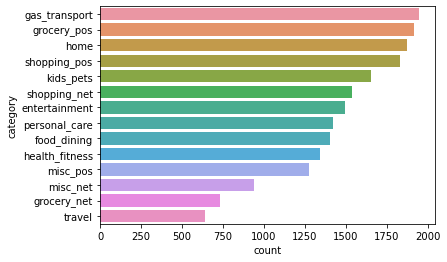

In [21]:
sns.countplot(y=df.category,order=df.category.value_counts().index)

### Insights:
* Most of the trasnsactions are done from gas transport ,home and grocery, least from travel

Text(0.5, 1.0, 'Fraud Data')

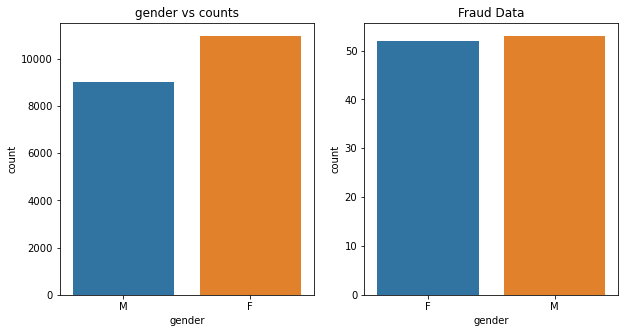

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(df.gender)
plt.title("gender vs counts")

plt.subplot(1,2,2)
sns.countplot(x='gender',data=fraud_data) #taking only fraud data 
plt.title("Fraud Data")

### Insights: 
* Gender is balanced so it is not dependant on target column.

<AxesSubplot:xlabel='amt', ylabel='Percent'>

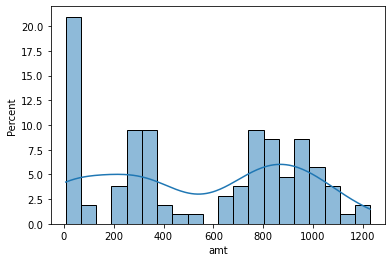

In [23]:
sns.histplot(x='amt',data=fraud_data,bins=20,stat='percent',kde=True)#taking only fraud data

#### Insights: 
* fraud amount starts 0 USD  till 400USD and agin from 600USD till 1200USD

<AxesSubplot:xlabel='count', ylabel='state'>

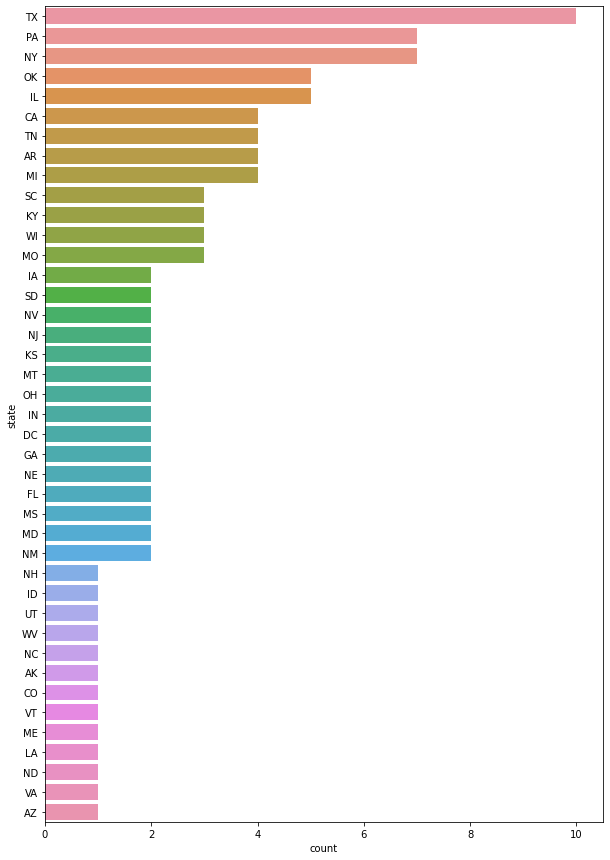

In [24]:
plt.figure(figsize=(10,15))
sns.countplot(y=fraud_data.state,order=fraud_data.state.value_counts().index)

### Insight:
* Most of the frauds are from states Texas, New Yorkand pennsylvania.

Text(0.5, 1.0, 'fraud data')

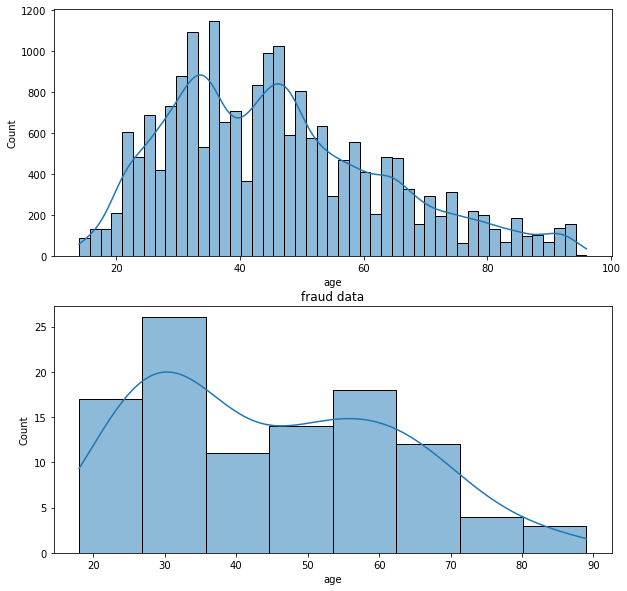

In [25]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.histplot(df.age,kde=True)

plt.subplot(2,1,2)
sns.histplot(fraud_data.age,kde=True)
plt.title("fraud data")

### Insight: 
* high age distribution between 25 and 55 

<AxesSubplot:xlabel='day_name', ylabel='count'>

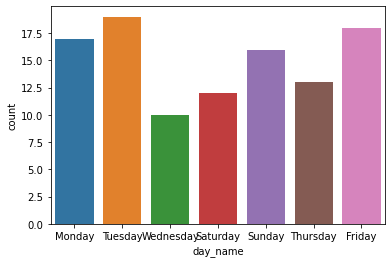

In [26]:
sns.countplot(data=fraud_data,x='day_name')

<AxesSubplot:xlabel='month', ylabel='count'>

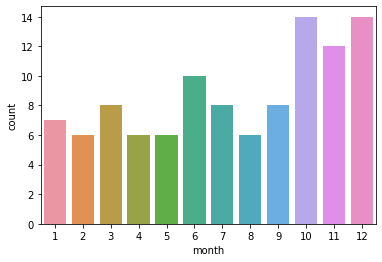

In [27]:
sns.countplot(data=fraud_data,x='month')

#### Insights: 
* There is high fraud transaction after september

<AxesSubplot:xlabel='hour', ylabel='count'>

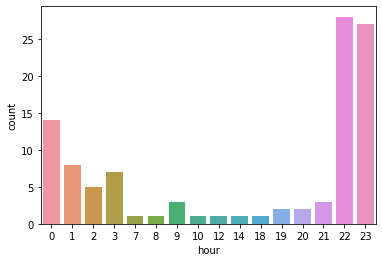

In [28]:
sns.countplot(data=fraud_data,x='hour')

### Insights:
* Most of the frauds have done between 10pm and 11pm.

<AxesSubplot:xlabel='lat_dist_cust_merch', ylabel='Count'>

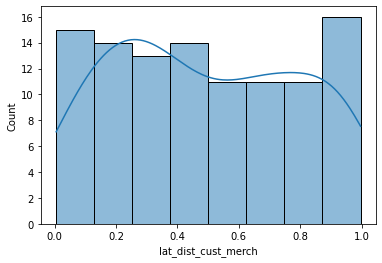

In [29]:
data=df.query('is_fraud==1')
sns.histplot(x='lat_dist_cust_merch',data=data,kde=True)

<AxesSubplot:xlabel='long_dist_cust_merch', ylabel='Count'>

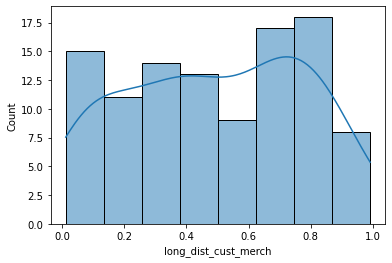

In [30]:
data=df.query('is_fraud==1')
sns.histplot(x='long_dist_cust_merch',data=data,kde=True)

## <font color='red'>Encoding

In [31]:
df_copy=df.copy()

Here i am using label encoder as order doesnot matter. I could have gone with one hot encoding but as dataset is large so i dont want to increase the dimensionality.

In [32]:
le=LabelEncoder()

In [33]:
catagories=df_copy[['category','gender','state','job','day_name','first','last','merchant']]
for i in catagories.columns:
    df_copy[i]=le.fit_transform(df_copy[i])

In [34]:
df_copy.head()

,cc_num,merchant,category,amt,first,last,gender,state,city_pop,job,unix_time,is_fraud,year,month,day_name,hour,age,lat_dist_cust_merch,long_dist_cust_merch
0,5.359540e+15,441,13,8517.38,233,138,1,25,18182,156,1380145007,0,2020,9,0,21,45,0.245562,0.289753
1,3.513620e+15,142,8,187.99,11,329,0,40,355,186,1384491501,0,2020,11,3,4,65,0.932368,0.123922
2,3.023540e+13,521,9,7.81,143,16,1,48,5512,179,1384344918,0,2020,11,0,12,40,0.694781,0.671837
3,6.011100e+15,352,4,122.29,323,96,0,44,1970,144,1372496117,0,2020,6,1,8,35,0.283916,0.247275
4,3.537800e+15,209,11,9.21,64,278,0,46,584,280,1374130600,0,2020,7,2,6,51,0.514435,0.873073


## <font color='red'>Feature selection

In [35]:
score=chi2(df_copy[['category','gender','state','job','day_name','first','last','merchant']],df_copy.is_fraud)

In [36]:
pd.Series(score[0],catagories.columns)

category     13.956689
gender        0.664529
state         1.216900
job          21.850054
day_name      0.426394
first       204.148062
last        181.285938
merchant     38.826854
dtype: float64

 According to chi2 score, those features which have high chi2 value, they are highly related to target variable. So category, state and job are related to target variable.

In [37]:
numuric=df_copy.select_dtypes(['int','float']).drop('is_fraud',axis=1)
anova=f_classif(numuric,df_copy.is_fraud)

In [38]:
pd.Series(anova[0],numuric.columns)

cc_num                    0.709746
merchant                  0.331434
category                  5.638886
amt                     548.228007
first                     3.933307
last                      2.532001
gender                    1.211381
state                     0.157722
city_pop                  0.718036
job                       0.290300
unix_time                 0.002513
year                      0.003779
month                     0.087865
day_name                  0.342075
hour                      5.647624
age                       0.485508
lat_dist_cust_merch       0.082007
long_dist_cust_merch      0.141010
dtype: float64

According to ANOVA score, those features which have high anova value, they are highly related to target variable. 

<AxesSubplot:>

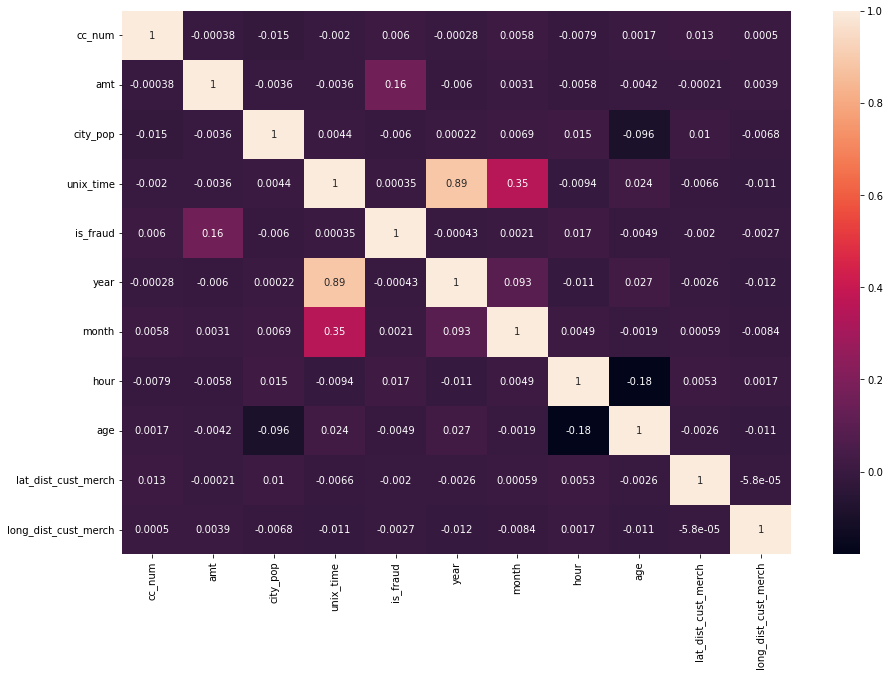

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

### Insights: 
* year is highly corelated with unix_time. There is multi colinearity between them.

## <font color='red'> Spliting Data

In [40]:
#defining x and y
x=df_copy.drop("is_fraud",axis=1)
y=df_copy.is_fraud

In [41]:
#spliting data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14000, 18)
(14000,)
(6000, 18)
(6000,)


## <font color='red'> Oversampling

Here i am using SMOTE technique which is used to balance the data. It is one of the oversampling technique.

In [43]:
#balancing the data
smote=SMOTE()

In [44]:
#before smote technique
y_train.value_counts()

0    13930
1       70
Name: is_fraud, dtype: int64

In [46]:
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [47]:
#after smote technique
y_train_smote.value_counts()

0    13930
1    13930
Name: is_fraud, dtype: int64

In [48]:
print(x_train_smote.shape)
print(y_train_smote.shape)

(27860, 18)
(27860,)


## <font color='red'> Feature Scaling

As many features are not following normal distribution so i am using MinMaxSacler

In [49]:
sc=MinMaxScaler()

In [50]:
scaled_xtrain=sc.fit_transform(x_train_smote)

In [51]:
scaled_xtest=sc.transform(x_test)

## <font color='red'> Model Building

In [52]:
#making function to run models
accuracy=[]
recall=[]


def run_model(model):
    model.fit(scaled_xtrain,y_train_smote)
    y_pred_train=model.predict(scaled_xtrain)
    y_pred_test=model.predict(scaled_xtest)
    a=accuracy_score(y_test,y_pred_test)
    b=recall_score(y_test,y_pred_test)
    
    accuracy.append(a)
    recall.append(b)
    
    print('Training accuracy',accuracy_score(y_train_smote,y_pred_train))
    print('Testing accurancy',accuracy_score(y_test,y_pred_test))
    print('\nConfusion metrics\n',confusion_matrix(y_test,y_pred_test))
    print('\nClassification Report\n',classification_report(y_test,y_pred_test))

### Logistic Regression

In [53]:
lr=LogisticRegression()

In [54]:
run_model(lr)

Training accuracy 0.8750538406317301
Testing accurancy 0.9043333333333333

Confusion metrics
 [[5405  560]
 [  14   21]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.91      0.95      5965
           1       0.04      0.60      0.07        35

    accuracy                           0.90      6000
   macro avg       0.52      0.75      0.51      6000
weighted avg       0.99      0.90      0.94      6000



####  AUC ROC Curve

In [55]:
y_pred_roc=lr.predict_proba(scaled_xtest)
y_pred_roc

array([[0.97247925, 0.02752075],
       [0.33586425, 0.66413575],
       [0.63465006, 0.36534994],
       ...,
       [0.2587721 , 0.7412279 ],
       [0.88546328, 0.11453672],
       [0.57865671, 0.42134329]])

In [56]:
fpr,tpr,thres=roc_curve(y_test,y_pred_roc[:,1])

Text(0.5, 1.0, 'ROC curve')

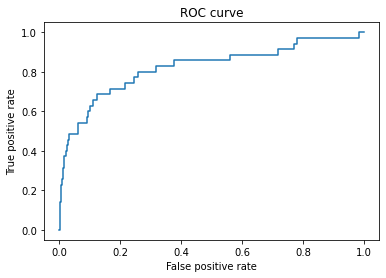

In [57]:
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

### Decision Tree Classifier

In [58]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [59]:
run_model(dtc)

Training accuracy 0.8975233309404164
Testing accurancy 0.9556666666666667

Confusion metrics
 [[5709  256]
 [  10   25]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      5965
           1       0.09      0.71      0.16        35

    accuracy                           0.96      6000
   macro avg       0.54      0.84      0.57      6000
weighted avg       0.99      0.96      0.97      6000



In [60]:
#feature selection using model based techniques
pd.Series(dtc.feature_importances_,x_train_smote.columns)*100

cc_num                   0.000000
merchant                 0.000000
category                 4.696442
amt                     92.333582
first                    0.000000
last                     0.000000
gender                   2.409487
state                    0.000000
city_pop                 0.000000
job                      0.000000
unix_time                0.000000
year                     0.000000
month                    0.000000
day_name                 0.000000
hour                     0.000000
age                      0.560489
lat_dist_cust_merch      0.000000
long_dist_cust_merch     0.000000
dtype: float64

## Random Forest Classifier

In [61]:
rfc=RandomForestClassifier(n_estimators=100, max_depth=2,criterion='gini',min_samples_split=2,min_samples_leaf=1)

In [62]:
run_model(rfc)

Training accuracy 0.896554199569275
Testing accurancy 0.9418333333333333

Confusion metrics
 [[5622  343]
 [   6   29]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      5965
           1       0.08      0.83      0.14        35

    accuracy                           0.94      6000
   macro avg       0.54      0.89      0.56      6000
weighted avg       0.99      0.94      0.97      6000



In [63]:
#feature selection using model based techniques
pd.Series(rfc.feature_importances_,x_train_smote.columns)*100

cc_num                   0.409410
merchant                 4.260891
category                 1.594505
amt                     48.486337
first                    4.509305
last                     1.883207
gender                   4.767900
state                    0.153172
city_pop                 5.619607
job                      0.383778
unix_time                4.828687
year                     1.393748
month                    7.728908
day_name                 1.077512
hour                    11.837966
age                      0.168288
lat_dist_cust_merch      0.073375
long_dist_cust_merch     0.823403
dtype: float64

### Adaboost classifier

In [64]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
run_model(ada)

Training accuracy 0.9589375448671931
Testing accurancy 0.964

Confusion metrics
 [[5761  204]
 [  12   23]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      5965
           1       0.10      0.66      0.18        35

    accuracy                           0.96      6000
   macro avg       0.55      0.81      0.58      6000
weighted avg       0.99      0.96      0.98      6000



### GradientBoostingClassifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
run_model(gb)

Training accuracy 0.9830581478822685
Testing accurancy 0.9798333333333333

Confusion metrics
 [[5851  114]
 [   7   28]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      5965
           1       0.20      0.80      0.32        35

    accuracy                           0.98      6000
   macro avg       0.60      0.89      0.65      6000
weighted avg       0.99      0.98      0.99      6000



### SVM

In [66]:
svc=SVC(C=1.0,kernel='rbf',gamma='scale')
run_model(svc)

Training accuracy 0.9919239052404881
Testing accurancy 0.9781666666666666

Confusion metrics
 [[5863  102]
 [  29    6]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      5965
           1       0.06      0.17      0.08        35

    accuracy                           0.98      6000
   macro avg       0.53      0.58      0.54      6000
weighted avg       0.99      0.98      0.98      6000



In [67]:
algo=['LogisticRegression','DecisionTree','RandomForest','Adaboost','GradientBoost','SVM']

In [68]:
performance=pd.DataFrame(
     {'Algotithms':algo,
     'Accuracy':accuracy,
    'recall':recall})

In [69]:
performance

,Algotithms,Accuracy,recall
0,LogisticRegression,0.904333,0.600000
1,DecisionTree,0.955667,0.714286
2,RandomForest,0.941833,0.828571
3,Adaboost,0.964000,0.657143
4,GradientBoost,0.979833,0.800000
5,SVM,0.978167,0.171429


Text(0, 0.5, 'Accuracy')

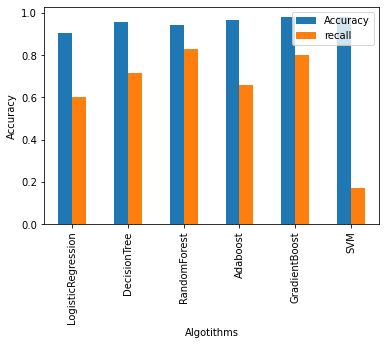

In [71]:
performance.plot(x='Algotithms',y=['Accuracy','recall'],kind='bar')
plt.ylabel("Accuracy")

## <font color='red'> Conclusion

 * As this is fraud detection problem, our main focus will be on recall i.e. type 2 error.
 * Random forest and Gradient boosting are giving good accuracy with good recall score. So we may consider these two algorithms.